**Step 1 훈련 세트와 테스트 세트 만들기**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# CSV 파일 불러오기
data = pd.read_csv('DATA_Korean_Lotto_20021207-20210424.csv')

# 데이터 확인
data.head()

,lottery,date,num1,num2,num3,num4,num5,num6,bonus
0,1,2002-12-07,10,23,29,33,37,40,16
1,2,2002-12-14,9,13,21,25,32,42,2
2,3,2002-12-21,11,16,19,21,27,31,30
3,4,2002-12-28,14,27,30,31,40,42,2
4,5,2003-01-04,16,24,29,40,41,42,3


In [33]:
# 결측값 확인
data.isna().sum()

lottery    0
date       0
num1       0
num2       0
num3       0
num4       0
num5       0
num6       0
bonus      0
dtype: int64

In [34]:
print(data.dtypes)

lottery     int64
date       object
num1        int64
num2        int64
num3        int64
num4        int64
num5        int64
num6        int64
bonus       int64
dtype: object


In [35]:
# 'date' 열을 datetime 으로 변환
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)

data.dropna(inplace=True)

lottery             int64
date       datetime64[ns]
num1                int64
num2                int64
num3                int64
num4                int64
num5                int64
num6                int64
bonus               int64
dtype: object


In [36]:
# 데이터셋의 크기 확인
data.shape

(960, 9)

In [37]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 특성과 레이블 분리 (여기서는 'num1'에서 'num6'까지를 예측하려고 함)
# 날짜 데이터를 제외
X = data.drop(['date', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6' , 'bonus'], axis=1)
y = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6' , 'bonus']]

# 훈련 데이터와 테스트 데이터 분리 (80-20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((768, 1), (192, 1), (768, 7), (192, 7))

In [49]:
# 데이터 피처들의 기초 통계량 계산
data.describe()

,lottery,num1,num2,num3,num4,num5,num6,bonus
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,480.500000,6.630208,13.047917,19.963542,26.269792,32.876042,39.525000,22.365625
std,277.272429,5.273314,6.838964,7.464740,7.629393,6.867603,5.278619,13.232290
min,1.000000,1.000000,2.000000,3.000000,5.000000,9.000000,19.000000,1.000000
25%,240.750000,2.000000,8.000000,14.000000,21.000000,28.000000,37.000000,11.000000
50%,480.500000,5.000000,12.000000,19.000000,27.000000,34.000000,41.000000,22.000000
75%,720.250000,10.000000,17.000000,25.000000,32.000000,38.000000,44.000000,34.000000
max,960.000000,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000,45.000000


**Step 2 데이터 탐색 및 시각화**

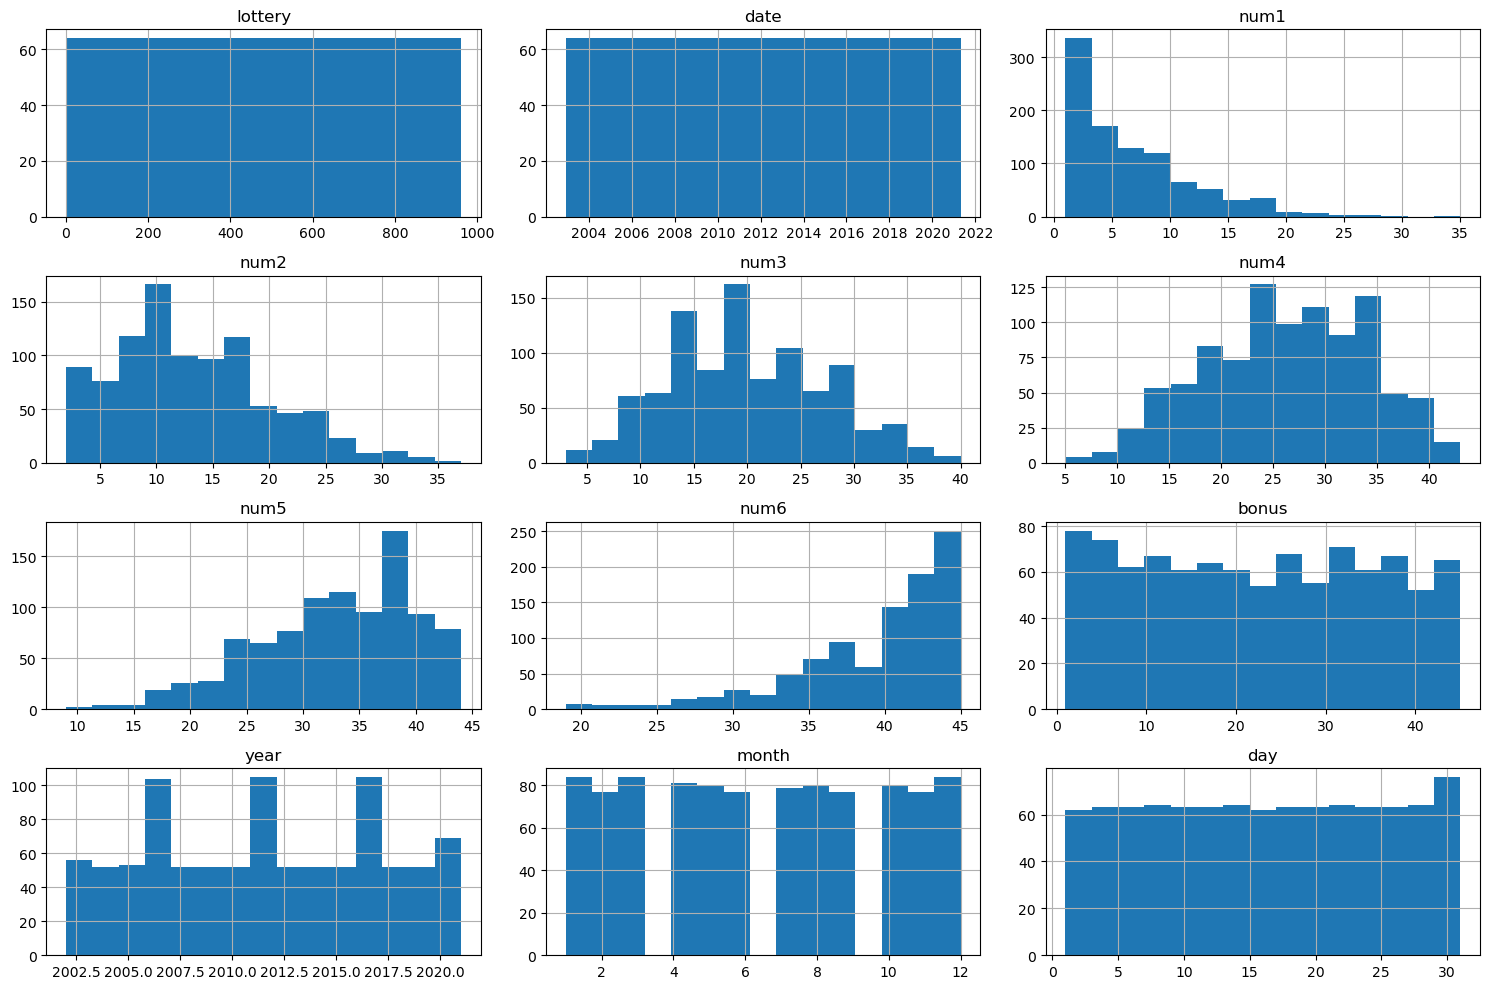

In [22]:
# 히스토그램 시각화
def plot_histograms(dataframe):
    dataframe.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
plot_histograms(data)

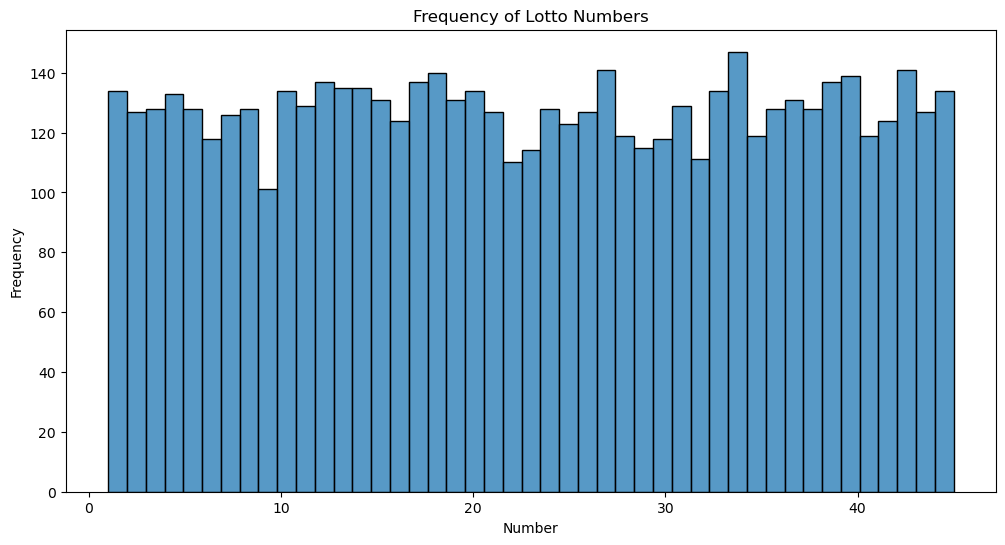

In [23]:
# 모든 번호를 하나의 리스트로 합침
all_numbers = data['num1'].tolist() + data['num2'].tolist() + data['num3'].tolist() + \
              data['num4'].tolist() + data['num5'].tolist() + data['num6'].tolist()

# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.histplot(all_numbers, bins=45, kde=False)
plt.title('Frequency of Lotto Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

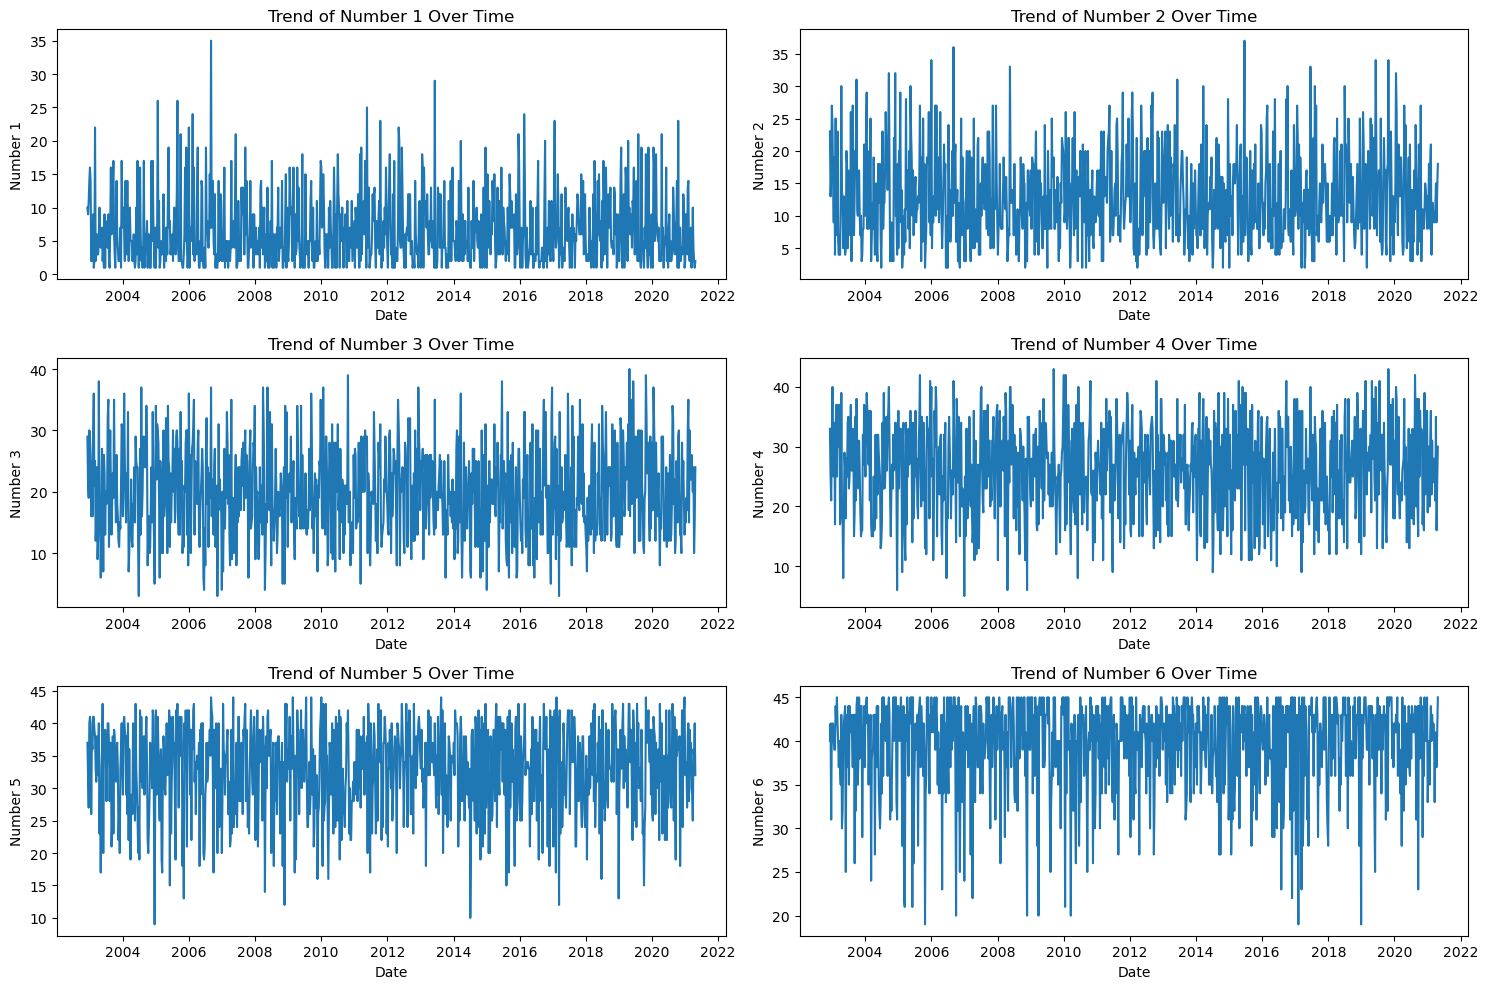

In [24]:
# 각 숫자별 시간에 따른 변화를 별도의 그래프로 시각화
plt.figure(figsize=(15, 10))

for i in range(1, 7):
    plt.subplot(3, 2, i)
    sns.lineplot(data=data, x='date', y=f'num{i}')
    plt.title(f'Trend of Number {i} Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'Number {i}')

plt.tight_layout()
plt.show()

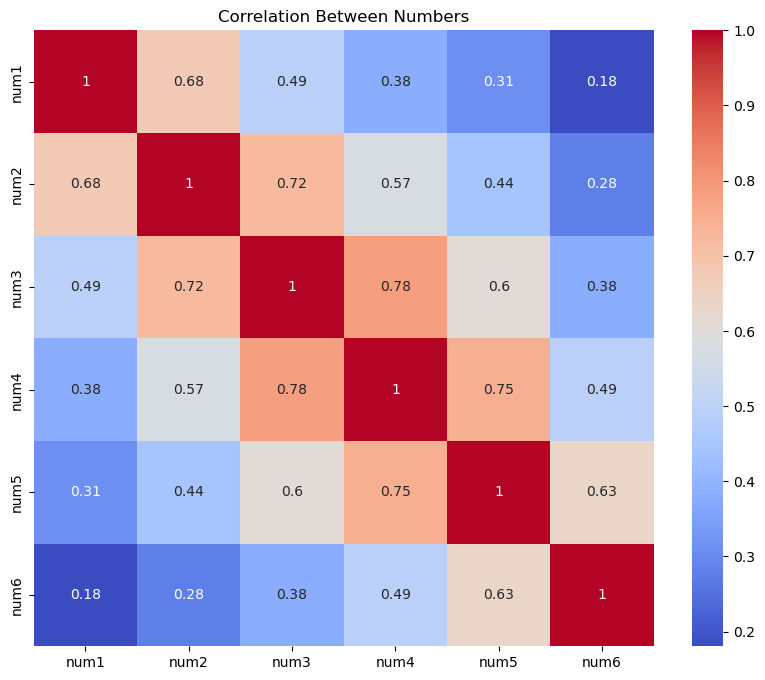

In [25]:
#번호간의 상관관계
# 숫자 열만 추출
number_data = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']]

# 상관관계 계산
correlation = number_data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numbers')
plt.show()

**Step 3 데이터 전처리**

In [39]:
# 결측치 없음

# 이상치 확인
print(data)

     lottery       date  num1  num2  num3  num4  num5  num6  bonus
0          1 2002-12-07    10    23    29    33    37    40     16
1          2 2002-12-14     9    13    21    25    32    42      2
2          3 2002-12-21    11    16    19    21    27    31     30
3          4 2002-12-28    14    27    30    31    40    42      2
4          5 2003-01-04    16    24    29    40    41    42      3
..       ...        ...   ...   ...   ...   ...   ...   ...    ...
955      956 2021-03-27    10    11    20    21    25    41     40
956      957 2021-04-03     4    15    24    35    36    40      1
957      958 2021-04-10     2     9    10    16    35    37      1
958      959 2021-04-17     1    14    15    24    40    41     35
959      960 2021-04-24     2    18    24    30    32    45     14

[960 rows x 9 columns]


**Step 4 데이터 스케일링**

In [27]:
# 1부터 45까지의 정수로 구성, 모든 번호가 같은 범위를 가지므로. 추가적인 스케일링 X

**Step 5 모델 선택 및 훈련**

In [40]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error

# 테스트 세트를 사용하여 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print("테스트 세트의 MSE (평균 제곱 오차):", mse)
print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

테스트 세트의 MSE (평균 제곱 오차): 92.11369404761906
훈련 세트 크기: (768, 1)
테스트 세트 크기: (192, 1)


In [42]:
# 훈련 세트에 대한 모델의 성능 평가
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# 테스트 세트에 대한 모델의 성능 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test

(12.851316517857143, 92.11369404761906)

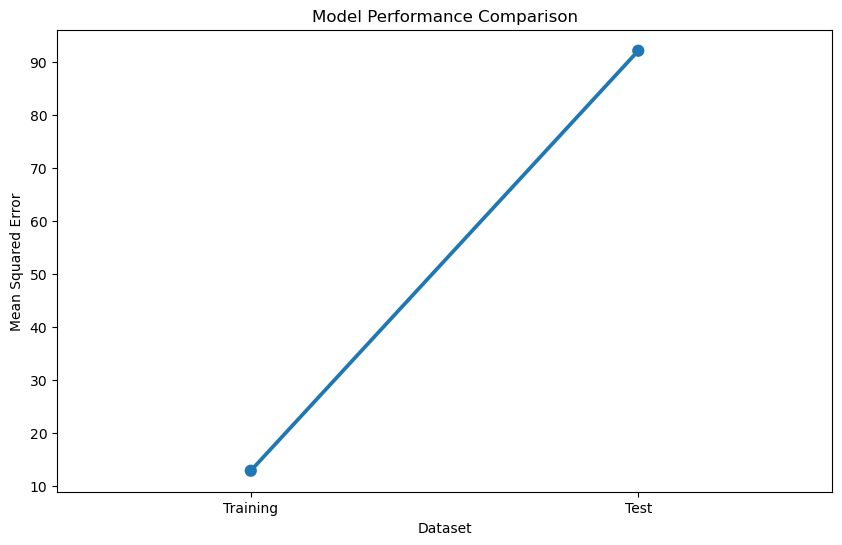

In [51]:
# 성능 비교를 위한 데이터 프레임 생성
performance_comparison = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'MSE': [mse_train, mse_test]
})

# 포인트 플롯으로 성능 시각화
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dataset', y='MSE', data=performance_comparison)
plt.title('Model Performance Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

In [48]:
# 예측을 위한 새로운 입력 데이터 준비
new_input_data = pd.DataFrame({'lottery': [1097]})

# 모델을 사용하여 로또 번호 예측
predicted_numbers = model.predict(new_input_data)

# 예측 결과를 정수로 반올림
predicted_numbers_rounded = np.round(predicted_numbers).astype(int)

# 예측된 로또 번호 출력(반올림)
print("예측된 로또 번호 : " , predicted_numbers_rounded)

예측된 로또 번호 :  [[ 2 14 20 26 33 42 10]]
